### SPATIAL DATA: A spatial data stores and allows queries of data defined by a geometric space.Many spatial databases can represent
### simple coordinates,points,lines and polygons. Some can handle more complex data like 3D objects,topological coverage and linear 
### linear networks.

### TEMPORAL DATA: A temporal database stores data relating to time whether past,present or future.

### SPATIO-TEMPORAL-DATA : Spatio-Temporal data analysis is used in data analysis when data is collected over both space and time.
### It describes location in certain location and time.
### For example: Shipping movements across geographic area over time.

### WE ARE USING MULTIPLE RASTERS (FROM ALL DATES IN APRIL).THEN WE WILL COMPARE AVERAGE RAINFALL ON EACH DAY OF APRIL IN TWO 
### PARTICULAR DISTRICTS AND VISUALIZE IT.

### TWO DISTRICTS THAT WE ARE USING ARE PORTO AND FARO

In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import rasterio 
import rasterstats
import numpy as np


In [6]:
import os

<AxesSubplot:>

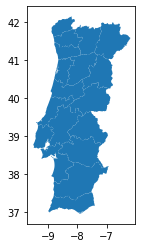

In [9]:
districts=gpd.read_file(r'C:\Users\Admin\Desktop\Python_Sem3\Raster_Data\districts.shp')
districts.plot()

In [11]:
districts

,NAME_1,geometry
0,Évora,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466..."
1,Aveiro,"MULTIPOLYGON (((-8.68208 40.69458, -8.68208 40..."
2,Beja,"MULTIPOLYGON (((-8.79264 37.71875, -8.79264 37..."
3,Braga,"POLYGON ((-8.04962 41.81636, -8.04908 41.81543..."
4,Bragança,"POLYGON ((-6.79995 41.98915, -6.79787 41.98859..."
5,Castelo Branco,"POLYGON ((-7.29277 40.41613, -7.29026 40.41438..."
6,Coimbra,"POLYGON ((-8.71904 40.47155, -8.71902 40.47153..."
7,Faro,"MULTIPOLYGON (((-7.88042 36.97347, -7.88042 36..."
8,Guarda,"MULTIPOLYGON (((-7.40951 40.92181, -7.40192 40..."
9,Leiria,"MULTIPOLYGON (((-9.50597 39.42181, -9.50597 39..."


### But I want 2 districts in my analysis so I will extract 2

In [14]:
## Porto
districts.loc[12]
type(districts.loc[12])

pandas.core.series.Series

### From the above you can see that it is a pandas series. I want to convert it into data frame

In [16]:
porto_df=pd.DataFrame(districts.loc[12])
porto_df

,12
NAME_1,Porto
geometry,(POLYGON ((-8.68626880645752 41.16044998168951...


### But In actual I want it to be a geopanda data frame so that I can actually plot and vvisualize

<AxesSubplot:>

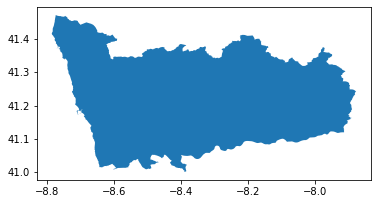

In [20]:
porto_df=pd.DataFrame(districts.loc[12]).transpose()
porto_polygon=gpd.GeoDataFrame(porto_df,geometry='geometry')
porto_polygon.plot()

In [23]:
type(porto_polygon)

geopandas.geodataframe.GeoDataFrame

### Another district that I want is FARO .I will do the same thing for extracting and plotting it

<AxesSubplot:>

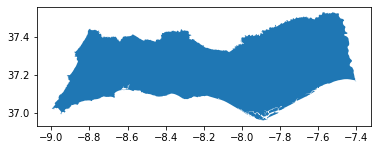

In [26]:
## FARO
districts.loc[7]
type(districts.loc[7])
faro_df=pd.DataFrame(districts.loc[7])
faro_df
faro_df=pd.DataFrame(districts.loc[7]).transpose()
faro_polygon=gpd.GeoDataFrame(faro_df,geometry='geometry')
faro_polygon.plot()

### But we also need to give coordinate reference system to these polygons same as in districts shp

In [30]:
porto_polygon.crs=districts.crs
faro_polygon.crs=districts.crs

In [32]:
porto_polygon.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Create an empty Pandas dataframe for average rainfall in faro and porto relative to dates(time)

In [42]:
data=pd.DataFrame('',columns=['Dates','Average_rainfall_porto','Average_rainfall_faro'],index=np.arange(1,31))
## I did np.arrange(1,31) because I have 30 rainfall rasters ie 30 days 

### Reading the information from rainfall rasters
### Oviously since I want to read the info of each and every raster, so I will run a for loop 
### store the info of files with extension .tif because only then it is a raster

In [45]:
i=1
for rast in os.listdir(r'C:\Users\Admin\Desktop\Python_Sem3\Raster_Data'):
    if(rast[-4:]=='.tif'):
        rf=rasterio.open(r'C:\Users\Admin\Desktop\Python_Sem3\Raster_Data'+'\\'+rast)
        rainfall_array=rf.read(1)
        affine=rf.transform
        
        #PORTO
        avg_rf_porto=rasterstats.zonal_stats(porto_polygon,rainfall_array,affine=affine,stats=['mean'],geojason_out=True)
        avg_rf_porto=avg_rf_porto[0]['mean']
        
        #FARO
        avg_rf_faro=rasterstats.zonal_stats(faro_polygon,rainfall_array,affine=affine,stats=['mean'],geojason_out=True)
        avg_rf_faro=avg_rf_faro[0]['mean']
        
        ## Filling the date avg rainfall in porto and faro in empty dataframe that we reated
        data.loc[i]['Dates']=rast[:-4] #because we dont need tif extension
        data.loc[i]['Average_rainfall_porto']=avg_rf_porto
        data.loc[i]['Average_rainfall_faro']=avg_rf_faro
        i=i+1
        

C:\Users\Admin\anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [47]:
data

,Dates,Average_rainfall_porto,Average_rainfall_faro
1,2020-4-1,0,2.24693
2,2020-4-10,0,0
3,2020-4-11,0,0
4,2020-4-12,0,0
5,2020-4-13,0,0
6,2020-4-14,10.7382,12.0749
7,2020-4-15,0,2.09738
8,2020-4-16,51.8286,1.08763
9,2020-4-17,0,0
10,2020-4-18,0,0


### Since the dates are not in increasing order we will first sort then plot
### We can simply convert it into date time format

In [51]:
data['Dates']=pd.to_datetime(data['Dates'],infer_datetime_format=True)
data

,Dates,Average_rainfall_porto,Average_rainfall_faro
1,2020-04-01,0,2.24693
2,2020-04-10,0,0
3,2020-04-11,0,0
4,2020-04-12,0,0
5,2020-04-13,0,0
6,2020-04-14,10.7382,12.0749
7,2020-04-15,0,2.09738
8,2020-04-16,51.8286,1.08763
9,2020-04-17,0,0
10,2020-04-18,0,0


In [54]:
data=data.sort_values(by='Dates')
data

,Dates,Average_rainfall_porto,Average_rainfall_faro
1,2020-04-01,0,2.24693
12,2020-04-02,0,0
23,2020-04-03,0,0
25,2020-04-04,0.154639,0.0864356
26,2020-04-05,21.8206,3.3077
27,2020-04-06,62.1052,1.96161
28,2020-04-07,0,3.1475
29,2020-04-08,0.650733,0.0960381
30,2020-04-09,2.5361,2.59778
2,2020-04-10,0,0


In [85]:
data.index

DatetimeIndex(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
               '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30'],
              dtype='datetime64[ns]', name='Dates', freq=None)

<AxesSubplot:xlabel='Dates'>

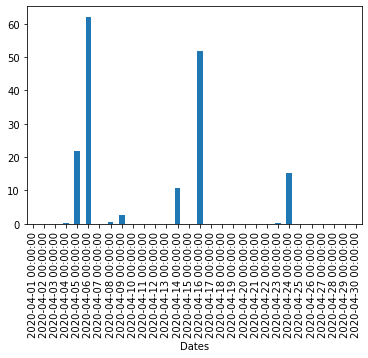

In [88]:
data.Average_rainfall_porto.plot(kind='bar')

<AxesSubplot:xlabel='Dates'>

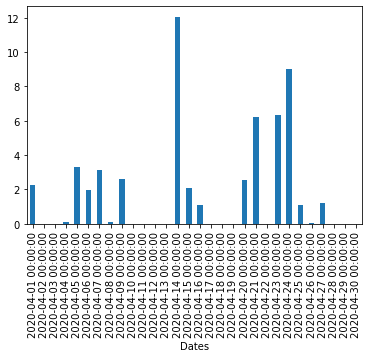

In [89]:
data.Average_rainfall_faro.plot(kind='bar')